In [1]:
import pandas as pd
import deeplake
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Configuración para mostrar todas las columnas
pd.set_option('display.max_colwidth', None)

c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.9.26) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [17]:
# Cargar dataset desde Deep Lake (asegúrate de que el archivo exista)
ds = deeplake.load("data/tracks_fma.csv")

# Cargar el dataset en pandas para manipulación
df = pd.read_csv('tracks_fma.csv')
df.info()  # Ver la estructura de los datos




data/tracks_fma.csv loaded successfully.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_comments      13128 non-null  int64  
 1   album_favorites     13128 non-null  int64  
 2   album_id            13128 non-null  int64  
 3   album_listens       13128 non-null  int64  
 4   album_tags          13128 non-null  object 
 5   album_title         13128 non-null  object 
 6   album_tracks        13128 non-null  int64  
 7   artist_comments     13128 non-null  int64  
 8   artist_favorites    13128 non-null  int64  
 9   artist_id           13128 non-null  int64  
 10  artist_name         13128 non-null  object 
 11  artist_tags         13128 non-null  object 
 12  set_split           13128 non-null  object 
 13  set_subset          13128 non-null  object 
 14  track_bit_rate      13128 non-null  int64  
 15  track_comments      13128 non-null  int64  
 16  trac

In [18]:
# %% Exploratory Data Analysis (EDA)
df.describe()  # Descripción estadística de las columnas numéricas

# %% Eliminar filas con valores nulos
df_cleaned = df.dropna()



In [19]:
# Eliminar duplicados y luego eliminar filas con valores nulos
df_cleaned = df.drop_duplicates().dropna()

# Codificar la columna de 'genres' a valores numéricos
label_encoder = LabelEncoder()
df_cleaned['genres_encoded'] = label_encoder.fit_transform(df_cleaned['genres'])



In [20]:
# Escalar las características numéricas
numerical_features = ['track_duration', 'album_listens', 'track_listens']
numerical_features = [col for col in numerical_features if col in df_cleaned.columns]
if numerical_features:
    scaler = MinMaxScaler()
    df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [21]:
# Definir características (X) y etiquetas (y)
columns_to_drop = ['genres', 'genres_encoded', 'artist_name', 'album_title', 'track_date_created', 'album_tags', 'artist_tags']
columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]
X = df_cleaned.drop(columns=columns_to_drop)
y = df_cleaned['genres_encoded']


In [22]:
# Verificar si quedan valores nulos
print(df_cleaned.isnull().sum())

# Verificar duplicados
print(f'Duplicados: {df_cleaned.duplicated().sum()}')

album_comments        0
album_favorites       0
album_id              0
album_listens         0
album_tags            0
album_title           0
album_tracks          0
artist_comments       0
artist_favorites      0
artist_id             0
artist_name           0
artist_tags           0
set_split             0
set_subset            0
track_bit_rate        0
track_comments        0
track_date_created    0
track_duration        0
track_favorites       0
genres                0
genres_all            0
track_interest        0
track_listens         0
track_number          0
track_tags            0
track_title           0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
speechiness           0
tempo                 0
valence               0
md_artist_name        0
md_release            0
artist_discovery      0
artist_familiarity    0
artist_hotttnesss     0
song_currency         0
song_hotttnesss       0
genre_top_isna  

In [24]:
# Convertir la columna de fecha correctamente
df_cleaned['track_date_created'] = pd.to_datetime(df_cleaned['track_date_created'])
df_cleaned['track_year_created'] = df_cleaned['track_date_created'].dt.year

# Filtrar solo columnas numéricas
X_numeric = X.select_dtypes(include=['float64', 'int64']).astype(np.float32)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Reemplazar valores no numéricos en las columnas numéricas
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Rellenar valores NaN con la media de las columnas numéricas
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [25]:
# Entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.93
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.92      0.96        12
          16       0.00      0.00      0.00         1
          17       0.94      0.71      0.81        24
          19       0.00      0.00      0.00         1
          21       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         4
          25       1.00      1.00      1.00         2
          28       0.00      0.00      0.00         1
          29

c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eslab\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esl

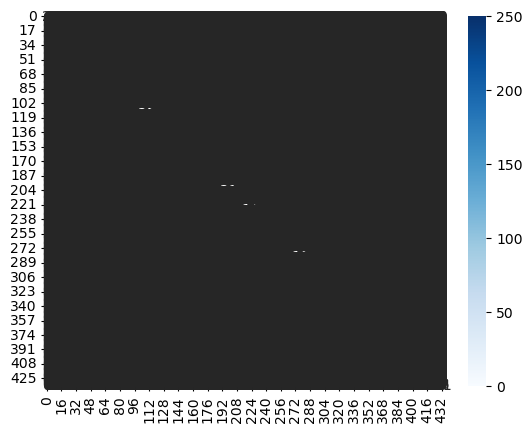

In [26]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [27]:
# Verificar tipos de datos antes de agregar a Deep Lake
if not X_numeric.dtypes.apply(lambda x: np.issubdtype(x, np.float32)).all():
    X_numeric = X_numeric.astype(np.float32)
if y.dtype != np.int32:
    y = y.astype(np.int32)

# Crear los tensores y agregar datos
ds.create_tensor("features", htype="generic", dtype="float32", exist_ok=True)
ds.create_tensor("labels", htype="generic", dtype="int32", exist_ok=True)
ds["features"].extend(X_numeric.to_numpy())
ds["labels"].extend(y.to_numpy())


In [30]:

ds.visualize()
